In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import pathlib

%load_ext autoreload
%autoreload 2

In [2]:
# load the data

root_dir = Path.cwd().parent.parent
print(root_dir)
path_processed_data_dir = root_dir / 'data/processed'
data_file = path_processed_data_dir / 'births_with_geo_apgar_consolidated.csv.gz'

c:\_Python\cdc-birth-data


In [3]:
df = pd.read_csv(data_file, compression='gzip',)

# drop all rows with state_name = 'United States'
df = df[(df.state_name_mr != 'United States') & (df.state_name_mr != 'Puerto Rico')]
df.head()

C:\Users\Tim\Anaconda3\envs\featstore\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,dob_yy,dob_mm,mrcntyfips,mrcityfips,state_name_mr,mrstatefips,apgar5,births
9,1982,1,1001,999,Alabama,1,5,1
10,1982,1,1001,999,Alabama,1,7,2
11,1982,1,1001,999,Alabama,1,8,6
12,1982,1,1001,999,Alabama,1,9,18
13,1982,1,1001,999,Alabama,1,10,17


In [4]:
df['state_name_mr'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [5]:
# load df_abbr
df_abbr = pd.read_csv(root_dir / 'data/external/state_abbreviations.csv', names=['state_name_mr', 'state_abbr'])
df_abbr.head()

,state_name_mr,state_abbr
0,Alabama,AL
1,Alaska,AK
2,American Samoa,AS
3,Arizona,AZ
4,Arkansas,AR


In [6]:

# merge df_abbr with df on state_name_mr
df = df.merge(df_abbr, how='left', on='state_name_mr')
df.head()

,dob_yy,dob_mm,mrcntyfips,mrcityfips,state_name_mr,mrstatefips,apgar5,births,state_abbr
0,1982,1,1001,999,Alabama,1,5,1,AL
1,1982,1,1001,999,Alabama,1,7,2,AL
2,1982,1,1001,999,Alabama,1,8,6,AL
3,1982,1,1001,999,Alabama,1,9,18,AL
4,1982,1,1001,999,Alabama,1,10,17,AL


In [7]:
# drop dob_mm	mrcntyfips	mrcityfips
df = df.drop(columns=['dob_mm', 'mrcntyfips', 'mrcityfips', 'apgar5', 'mrstatefips'])

# get totals of births by state and dob_yy
df = df.groupby(['state_abbr', 'state_name_mr', 'dob_yy'], as_index=False).sum()
df.head()

,state_abbr,state_name_mr,dob_yy,births
0,AK,Alaska,1982,11287
1,AK,Alaska,1983,11994
2,AK,Alaska,1984,12447
3,AK,Alaska,1985,12844
4,AK,Alaska,1986,12167


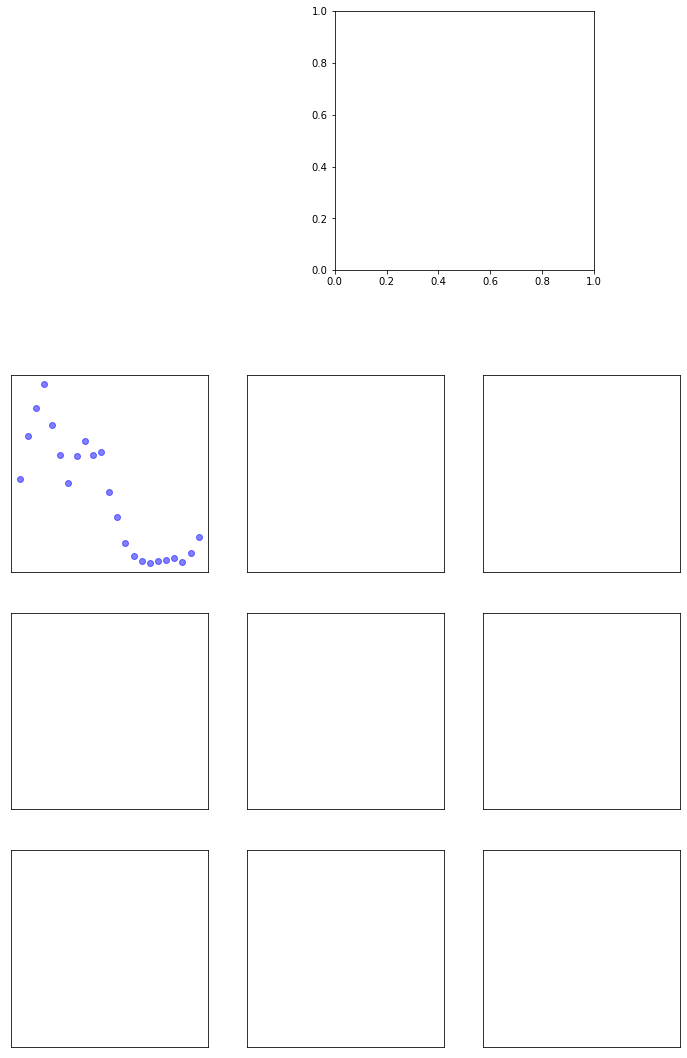

In [17]:
# square subplots https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/axes_box_aspect.html#box-aspect-for-many-subplots
fig, ax = plt.subplots(3,3, figsize=(12, 12), subplot_kw=dict(box_aspect=1))
# fig.tight_layout()

# make each individual subplot tight to each other
# fig.subplots_adjust(hspace=0.1, wspace=0.1)
fig.subplots_adjust(bottom=0.1,)

# set the aspect ratio for each subplot to 1.0
# for axi in fig.axes:
#     axi.set_aspect('equal')

dft = df[df['state_abbr']=='AK']

ax[0,0].plot(dft['dob_yy'], dft['births'], 'o', color='blue', alpha=0.5)

# [x0, y0, width, height]
ax2 =fig.add_axes([0.5,1,0.3,0.3])


# # remove all axes labels and ticks
for axi in ax.flat:
    axi.set(xticks=[], yticks=[])
    # axi.set_aspect('equal')
# save the figure as a PNG
# fig.savefig('births_by_state_dob_yy.png', bbox_inches='tight', dpi=300)

plt.show()


In [31]:
dft.dob_yy

0     1982
1     1983
2     1984
3     1985
4     1986
5     1987
6     1988
7     1989
8     1990
9     1991
10    1992
11    1993
12    1994
13    1995
14    1996
15    1997
16    1998
17    1999
18    2000
19    2001
20    2002
21    2003
22    2004
Name: dob_yy, dtype: int64